# Analysis of PolyaClassifier site definition for *S. pombe*

**Purpose**: To identify 5mer motifs important to cleavage site definition in *S. pombe* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'schizosaccharomyces_pombe'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-5'
kmer      = 5


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_spom_5mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 2492

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/schizosaccharomyces_pombe/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-5


In [8]:
## Load motif family definitions for S. pombe

spom_definitions = {'patterns' : {}, 'distance' : {}}

# By Hamming distance
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.spom.{kmer}mers.distance.pickle'), mode = 'rb') as handle:
        spom_definitions['distance'][kmer] = pickle.load(handle)


In [9]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)

sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 72


# ANALYSIS

In [10]:
family_cmap = {
    'A-rich'        : '#2278b5',
    'A-rich_d0'     : '#2278b5',
    'A-rich_d1'     : '#6ab1e3',
    'A-rich_d2'     : '#9ccbec',
    'A-rich_d3'     : '#cde5f5',
    'T-rich'        : '#2fa148',
    'T-rich_d0'     : '#2fa148',
    'T-rich_d1'     : '#73d689',
    'T-rich_d2'     : '#a1e4b0',
    'GTA'           : '#fcb316',
    'GTA_d0'        : '#fcb316',
    'TAG'           : '#8C0800',
    'TAG_d0'        : '#8C0800',
    'GTA-TAG'       : '#D55E00',
    'GTA-TAG_d0'    : '#D55E00',
    'GTA_controls'  : '#6d6e71',
    'Other'         : '#F7F8F8',
    'Pattern'       : '#000000',
}


## Top individual motifs in each region

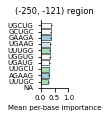

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
44  UGCUG      712.0  0.388961  0.402605  0.375316      Other  0.013645
22  GCUGC      437.0  0.370185  0.387958  0.352413      Other  0.017773
21  GAAGA      852.0  0.355960  0.375013  0.336907  A-rich_d2  0.019053
42  UGAAG      744.0  0.343363  0.359583  0.327143  A-rich_d3  0.016220
66  UUUGG      770.0  0.330319  0.344406  0.316232  T-rich_d2  0.014087
45  UGGUG      526.0  0.328162  0.344786  0.311538      Other  0.016624
43  UGAUG      651.0  0.312702  0.328842  0.296562      Other  0.016140
56  UUGCU      715.0  0.296569  0.308759  0.284379  T-rich_d2  0.012190
8   AGAAG      745.0  0.284986  0.307635  0.262336  A-rich_d2  0.022650
65  UUUGC      694.0  0.281291  0.295274  0.267308  T-rich_d2  0.013983
0.4026051991064653


In [11]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-250,-121), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


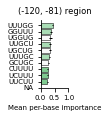

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
66  UUUGG      241.0  0.437333  0.460793  0.413874  T-rich_d2  0.023459
23  GGUUU      221.0  0.373354  0.392433  0.354275  T-rich_d2  0.019079
45  UGGUG      106.0  0.354917  0.393885  0.315950      Other  0.038967
56  UUGCU      210.0  0.337695  0.358680  0.316710  T-rich_d2  0.020985
44  UGCUG      152.0  0.330801  0.357040  0.304563      Other  0.026238
65  UUUGC      212.0  0.316856  0.344248  0.289464  T-rich_d2  0.027392
22  GCUGC      111.0  0.280643  0.306668  0.254618      Other  0.026025
19  CUUUU      477.0  0.258067  0.276708  0.239425  T-rich_d1  0.018641
41  UCUUU      434.0  0.254869  0.274547  0.235191  T-rich_d1  0.019678
55  UUCUU      436.0  0.246096  0.265316  0.226876  T-rich_d1  0.019220
0.4607925088384227


In [12]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-120,-81), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


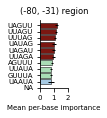

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
35  UAGUU      365.0  1.216164  1.327165  1.105163     TAG_d0  0.111001
52  UUAGU      383.0  1.136410  1.228887  1.043933     TAG_d0  0.092477
61  UUUAG      485.0  1.077016  1.144979  1.009053     TAG_d0  0.067963
36  UAUAG      204.0  0.980320  1.115906  0.844734     TAG_d0  0.135586
33  UAGAU      257.0  0.977376  1.096182  0.858571     TAG_d0  0.118806
51  UUAGA      299.0  0.972088  1.067327  0.876849     TAG_d0  0.095239
11  AGUUU      403.0  0.836559  0.914026  0.759093  T-rich_d2  0.077467
53  UUAUA      342.0  0.790051  0.892087  0.688015  T-rich_d2  0.102036
27  GUUUA      473.0  0.785620  0.850825  0.720414  T-rich_d2  0.065205
31  UAAUA      156.0  0.763094  0.978411  0.547778  A-rich_d2  0.215316
1.3271653026933554


In [13]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-80,-31), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


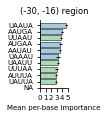

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
31  UAAUA      178.0  4.724309  4.991686  4.456933  A-rich_d2  0.267376
6   AAUGA      196.0  3.963915  4.194098  3.733731  A-rich_d2  0.230184
50  UUAAU      281.0  3.826696  4.018185  3.635207  T-rich_d2  0.191489
13  AUGAA      206.0  3.622706  3.870616  3.374797  A-rich_d2  0.247909
5   AAUAU      193.0  3.618896  3.850479  3.387313  A-rich_d2  0.231583
30  UAAAU      134.0  3.237016  3.518795  2.955237  A-rich_d2  0.281779
32  UAAUU      185.0  3.205473  3.416250  2.994697  T-rich_d2  0.210776
59  UUUAA      173.0  2.984606  3.240821  2.728390  T-rich_d2  0.256215
15  AUUUA      177.0  2.916738  3.120571  2.712904  T-rich_d2  0.203833
38  UAUUA      156.0  2.855159  3.095795  2.614522  T-rich_d2  0.240637
4.991685637665719


In [14]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-30,-16), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,5), xtickint = 1, verbose = True
                     )


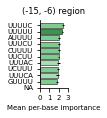

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
69  UUUUC      252.0  2.457667  2.550423  2.364912  T-rich_d1  0.092755
71  UUUUU      788.0  2.375745  2.432440  2.319050  T-rich_d0  0.056695
16  AUUUU      351.0  2.068070  2.160297  1.975844  T-rich_d1  0.092226
64  UUUCU      189.0  2.031773  2.114962  1.948584  T-rich_d1  0.083189
19  CUUUU      200.0  2.003405  2.092304  1.914507  T-rich_d1  0.088898
55  UUCUU      164.0  1.997263  2.088091  1.906436  T-rich_d1  0.090827
60  UUUAC      125.0  1.947179  2.122877  1.771482  T-rich_d2  0.175698
41  UCUUU      179.0  1.927118  2.019546  1.834691  T-rich_d1  0.092428
63  UUUCA      135.0  1.881393  2.029373  1.733413  T-rich_d2  0.147980
28  GUUUU      209.0  1.818743  1.916087  1.721398  T-rich_d1  0.097344
2.5504229394464573


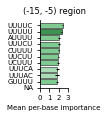

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
69  UUUUC      261.0  2.419986  2.513747  2.326225  T-rich_d1  0.093761
71  UUUUU      859.0  2.331426  2.385436  2.277415  T-rich_d0  0.054011
16  AUUUU      379.0  2.063140  2.150080  1.976200  T-rich_d1  0.086940
64  UUUCU      201.0  2.036313  2.116469  1.956156  T-rich_d1  0.080157
19  CUUUU      230.0  1.995473  2.076163  1.914784  T-rich_d1  0.080689
55  UUCUU      187.0  1.969996  2.053918  1.886074  T-rich_d1  0.083922
41  UCUUU      205.0  1.943177  2.026582  1.859771  T-rich_d1  0.083405
63  UUUCA      144.0  1.852890  1.993275  1.712506  T-rich_d2  0.140384
60  UUUAC      131.0  1.830880  2.022959  1.638801  T-rich_d2  0.192079
28  GUUUU      223.0  1.779852  1.874818  1.684887  T-rich_d1  0.094965
2.5137471145455255


In [15]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-15,-6), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-15,-5), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


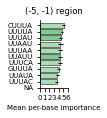

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
18  CUUUA       67.0  5.110244  5.442480  4.778007  T-rich_d2  0.332236
68  UUUUA      155.0  4.667236  4.888876  4.445595  T-rich_d1  0.221641
62  UUUAU      143.0  4.429048  4.716917  4.141180  T-rich_d1  0.287869
50  UUAAU       81.0  4.394379  4.899491  3.889268  T-rich_d2  0.505112
59  UUUAA       96.0  4.371107  4.764175  3.978038  T-rich_d2  0.393068
54  UUAUU      133.0  4.314783  4.644254  3.985312  T-rich_d1  0.329471
63  UUUCA       71.0  4.314402  4.730302  3.898502  T-rich_d2  0.415900
27  GUUUA       49.0  4.025142  4.390551  3.659733  T-rich_d2  0.365409
53  UUAUA       82.0  3.703620  4.007098  3.400142  T-rich_d2  0.303478
60  UUUAC       89.0  3.587424  3.967921  3.206926  T-rich_d2  0.380497
5.442479612596921


/home/esk863/.conda/envs/tf-train/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:135: RuntimeWarning: invalid value encountered in double_scalars
  return self.sum / self.sum_weights
/home/esk863/.conda/envs/tf-train/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:182: RuntimeWarning: invalid value encountered in double_scalars
  return self.sumsquares / (self.sum_weights - self.ddof)
/home/esk863/.conda/envs/tf-train/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in sqrt
  return std / np.sqrt(self.sum_weights - 1)


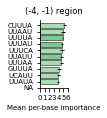

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
18  CUUUA       65.0  5.261007  5.525086  4.996928  T-rich_d2  0.264079
50  UUAAU       73.0  4.933051  5.323119  4.542983  T-rich_d2  0.390068
68  UUUUA      147.0  4.865718  5.049991  4.681446  T-rich_d1  0.184273
62  UUUAU      133.0  4.757342  4.980464  4.534220  T-rich_d1  0.223122
63  UUUCA       62.0  4.733780  5.103447  4.364112  T-rich_d2  0.369667
54  UUAUU      122.0  4.620320  4.924294  4.316346  T-rich_d1  0.303974
59  UUUAA       92.0  4.619246  4.942096  4.296396  T-rich_d2  0.322850
27  GUUUA       48.0  4.102983  4.440316  3.765651  T-rich_d2  0.337332
40  UCAUU       73.0  3.974938  4.365100  3.584776  T-rich_d2  0.390162
53  UUAUA       79.0  3.892940  4.115306  3.670574  T-rich_d2  0.222366
5.5250859996449915


In [16]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-5,-1), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,6), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (-4,-1), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,6), xtickint = 1, verbose = True
                     )


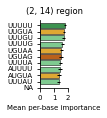

    motif  frequency     score   conf_lo   conf_hi      family  error_lo
71  UUUUU      602.0  1.770033  1.840897  1.699169   T-rich_d0  0.070864
57  UUGUA      145.0  1.724227  1.818667  1.629787      GTA_d0  0.094440
67  UUUGU      227.0  1.682414  1.781680  1.583148   T-rich_d1  0.099266
70  UUUUG      234.0  1.583745  1.685381  1.482109   T-rich_d1  0.101636
46  UGUAA       96.0  1.527619  1.629494  1.425745      GTA_d0  0.101874
47  UGUAG       52.0  1.490620  1.620725  1.360514  GTA-TAG_d0  0.130106
68  UUUUA      243.0  1.443312  1.551030  1.335595   T-rich_d1  0.107717
16  AUUUU      256.0  1.433860  1.565558  1.302161   T-rich_d1  0.131699
14  AUGUA       78.0  1.358367  1.475164  1.241570      GTA_d0  0.116797
62  UUUAU      232.0  1.344853  1.445605  1.244101   T-rich_d1  0.100752
1.8408974186628104


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (2,14), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


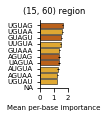

    motif  frequency     score   conf_lo   conf_hi      family  error_lo
47  UGUAG      353.0  1.617502  1.665534  1.569470  GTA-TAG_d0  0.048032
46  UGUAA      491.0  1.592424  1.627843  1.557005      GTA_d0  0.035419
25  GUAGU      302.0  1.539591  1.597509  1.481672  GTA-TAG_d0  0.057918
57  UUGUA      683.0  1.500871  1.535668  1.466074      GTA_d0  0.034797
24  GUAAA      369.0  1.396926  1.445843  1.348009      GTA_d0  0.048917
10  AGUAG      246.0  1.380738  1.439779  1.321698  GTA-TAG_d0  0.059040
34  UAGUA      330.0  1.372312  1.433716  1.310908  GTA-TAG_d0  0.061404
14  AUGUA      351.0  1.288711  1.340426  1.236996      GTA_d0  0.051715
9   AGUAA      290.0  1.258805  1.308139  1.209471      GTA_d0  0.049334
48  UGUAU      442.0  1.225284  1.258959  1.191610      GTA_d0  0.033675
1.665534036084118


In [18]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][5]['hamming'], sigmots, 
                      (15,60), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )
